In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#train.replace(0, np.nan, inplace= True)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['LotFrontage'].isnull().sum()

259

In [5]:
null_to_drop=[val for val in train.columns if train[val].isnull().sum()>100]
train.drop(null_to_drop,axis=1,inplace=True)

In [6]:
null_object=[val for val in train.columns if train[val].isnull().sum()>0 and train[val].dtypes==object]
print('object',len(null_object),null_object)

object 11 ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [7]:
null_intfloat=[val for val in train.columns if train[val].isnull().sum()>0 and train[val].dtypes!=object]


for feature in null_intfloat:
    ## replace by using median since there are outliers
    median_value=train[feature].median()
    
    ## create a new feature to capture nan values
    train[feature+'nan']=np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median_value,inplace=True)
    
train[null_intfloat].isnull().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [8]:
train.dropna(axis=0,inplace=True)

In [9]:
train.nunique().head(50)

Id              1338
MSSubClass        15
MSZoning           5
LotArea         1000
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual        9
OverallCond        8
YearBuilt        109
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       14
Exterior2nd       16
MasVnrType         4
MasVnrArea       325
ExterQual          4
ExterCond          4
Foundation         5
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       621
BsmtFinType2       6
BsmtFinSF2       141
BsmtUnfSF        764
TotalBsmtSF      700
Heating            4
HeatingQC          5
CentralAir         2
Electrical         5
1stFlrSF         727
2ndFlrSF         394
LowQualFinSF      16
GrLivArea        822
BsmtFullBath       3
BsmtHalfBath       3
FullBath     

In [10]:
for val in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train[val]=train['YrSold']-train[val]
    
train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [11]:
train=pd.get_dummies(train,drop_first=True)

In [12]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,5,5,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,31,31,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,7,6,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,91,36,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,8,8,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
train.shape

(1338, 230)

In [14]:
train.corr().head(35)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.016725,-0.036083,-0.044455,0.011850,0.023664,0.028584,-0.051038,-0.004919,-0.004908,...,-0.049545,-0.021264,-0.022131,0.030472,0.024220,-0.020253,-0.000457,0.004871,0.021197,-0.023974
MSSubClass,0.016725,1.000000,-0.134158,0.051690,-0.098153,-0.057350,-0.039933,0.031333,-0.069053,-0.079329,...,0.011770,0.026709,-0.049269,-0.023965,0.025468,-0.004069,0.019357,0.003328,0.041548,-0.055585
LotArea,-0.036083,-0.134158,1.000000,0.090451,0.001415,0.004473,-0.002473,0.096727,0.210148,0.110493,...,0.000232,-0.012137,0.017550,-0.003582,-0.001004,-0.006739,-0.001475,-0.013141,0.006441,0.020112
OverallQual,-0.044455,0.051690,0.090451,1.000000,-0.163080,-0.570516,-0.550437,0.401175,0.197441,-0.086014,...,0.021931,0.011592,0.332307,-0.045852,-0.235661,-0.025195,-0.035511,-0.039052,-0.162843,0.327228
OverallCond,0.011850,-0.098153,0.001415,-0.163080,1.000000,0.419292,-0.031386,-0.141080,-0.060068,0.035698,...,0.007804,0.007804,-0.171307,-0.015135,0.165342,0.010242,-0.001681,-0.028165,0.165326,-0.166422
YearBuilt,0.023664,-0.057350,0.004473,-0.570516,0.419292,1.000000,0.618297,-0.299070,-0.222881,0.071783,...,0.000414,0.015217,-0.358054,0.001131,0.243346,0.029780,0.027154,0.042973,0.181683,-0.354191
YearRemodAdd,0.028584,-0.039933,-0.002473,-0.550437,-0.031386,0.618297,1.000000,-0.168429,-0.098121,0.087432,...,-0.019264,0.026623,-0.336220,0.018689,0.182643,0.046999,0.019428,0.052302,0.137038,-0.332710
MasVnrArea,-0.051038,0.031333,0.096727,0.401175,-0.141080,-0.299070,-0.168429,1.000000,0.253015,-0.083303,...,0.023210,-0.020323,0.167739,-0.016267,-0.129732,-0.016267,0.007677,-0.014514,-0.095011,0.163788
BsmtFinSF1,-0.004919,-0.069053,0.210148,0.197441,-0.060068,-0.222881,-0.098121,0.253015,1.000000,-0.064855,...,0.024270,-0.009908,0.031028,-0.027683,-0.013682,-0.009078,0.021220,-0.004737,-0.014222,0.030877
BsmtFinSF2,-0.004908,-0.079329,0.110493,-0.086014,0.035698,0.071783,0.087432,-0.083303,-0.064855,1.000000,...,-0.016223,0.043436,-0.091707,-0.008102,0.036392,-0.008102,-0.021485,-0.010023,0.036050,-0.090329


In [15]:
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline


In [16]:
#cormat=train.corr()
#top_corr_feature=cormat.index
#plt.figure(figsize=(20,20))


In [17]:
#plot heatmap
#g=sns.heatmap(train[top_corr_feature].corr(),annot=True)

In [18]:
feature_scale = [feature for feature in train.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
train = pd.concat([train[['Id','SalePrice']].reset_index(drop=True),
                 pd.DataFrame(sc.transform(train[feature_scale]), columns=feature_scale)], axis=1)

In [20]:
train.head()

,Id,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,208500,0.235294,0.033420,0.625,0.428571,0.038760,0.098361,0.12250,0.125089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,181500,0.000000,0.038795,0.500,0.857143,0.240310,0.524590,0.00000,0.173281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,223500,0.235294,0.046507,0.625,0.428571,0.054264,0.114754,0.10125,0.086109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,140000,0.294118,0.038561,0.625,0.428571,0.705426,0.606557,0.00000,0.038271,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,250000,0.235294,0.060576,0.750,0.428571,0.062016,0.147541,0.21875,0.116052,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
train_features = [feature for feature in train.columns if feature not in ['Id','SalePrice']]

x = train[train_features]
y = train['SalePrice']

In [22]:
x.shape

(1338, 228)

In [23]:
#Select KBest
from sklearn.feature_selection import SelectKBest,f_regression


selectKbest = SelectKBest(score_func=f_regression, k=220)
fit = selectKbest.fit(x, y)

/home/pallu/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/pallu/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/pallu/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/pallu/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
feature_score = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(fit.scores_)], axis=1)
feature_score.columns = ['feature', 'score']
print(feature_score.nlargest(28, 'score'))

                   feature        score
2              OverallQual  2124.635371
14               GrLivArea  1371.334207
24              GarageCars   927.630248
25              GarageArea   781.607222
11                1stFlrSF   770.191156
10             TotalBsmtSF   759.538054
150           ExterQual_TA   695.477689
17                FullBath   640.673098
21            TotRmsAbvGrd   584.936992
191         KitchenQual_TA   506.000164
4                YearBuilt   456.201774
5             YearRemodAdd   452.106683
155       Foundation_PConc   411.405596
160            BsmtQual_TA   409.496828
23             GarageYrBlt   404.442472
204       GarageFinish_Unf   395.708858
6               MasVnrArea   370.215036
22              Fireplaces   330.691272
149           ExterQual_Gd   305.116600
168       BsmtFinType1_GLQ   293.418587
202      GarageType_Detchd   254.177678
70    Neighborhood_NridgHt   247.392457
154      Foundation_CBlock   207.148978
7               BsmtFinSF1   198.516186


In [25]:
#Select from model
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0,max_iter=20000)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=20000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [26]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [27]:
# let's print the number of total and selected features


# this is how we can make a list of the selected features
selected_feat = x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


total features: 228
selected features: 226
features with coefficients shrank to zero: 2


In [28]:
selected_feat

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)

In [29]:
df = pd.concat([train[['Id','SalePrice']].reset_index(drop=True),
                       pd.DataFrame(train[selected_feat], columns=selected_feat)], axis=1)

In [30]:
df.head()

,Id,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,208500,0.235294,0.033420,0.625,0.428571,0.038760,0.098361,0.12250,0.125089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,181500,0.000000,0.038795,0.500,0.857143,0.240310,0.524590,0.00000,0.173281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,223500,0.235294,0.046507,0.625,0.428571,0.054264,0.114754,0.10125,0.086109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,140000,0.294118,0.038561,0.625,0.428571,0.705426,0.606557,0.00000,0.038271,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,250000,0.235294,0.060576,0.750,0.428571,0.062016,0.147541,0.21875,0.116052,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X=df.iloc[:,2:]
Y=df.iloc[:,1]

In [32]:
X.shape

(1338, 226)

In [33]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1204, 226) (1204,) (134, 226) (134,)


In [35]:
# define rmse function for validation
from sklearn.metrics import mean_squared_error
def rmse(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [36]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [37]:
print(model.feature_importances_)

[2.26601935e-03 6.80791240e-03 1.81213374e-01 2.65712246e-03
 3.27463146e-03 5.55931161e-03 3.73161831e-03 1.99250800e-02
 1.06622483e-03 2.59274669e-03 1.54928677e-02 2.92496628e-02
 1.71114397e-02 1.67509826e-04 6.09642450e-02 4.35073919e-03
 4.24632819e-04 3.78603037e-02 4.13626223e-03 5.51322777e-03
 1.28953313e-03 1.64893731e-02 1.43053622e-02 1.88951977e-03
 1.83978257e-01 1.33187184e-02 3.42812213e-03 2.73491675e-03
 1.01401396e-03 9.04355593e-04 1.72346762e-03 8.09727511e-04
 1.02588414e-04 2.73728547e-03 1.75978435e-03 2.18964453e-04
 2.05107843e-05 5.36729467e-03 3.52738948e-03 5.66131732e-05
 1.35375554e-03 3.04984357e-04 1.83459398e-03 9.77766170e-04
 1.29596278e-03 1.88732326e-03 0.00000000e+00 1.85473698e-03
 3.75479919e-04 8.59673457e-05 1.29399678e-03 1.05059214e-03
 5.38154315e-04 4.32009296e-06 3.53878464e-05 2.73390960e-04
 7.84207647e-04 8.41906452e-04 1.83342582e-03 3.57920599e-03
 4.32056915e-04 4.03191683e-04 1.25136776e-04 7.32823402e-05
 3.34062086e-04 1.512993

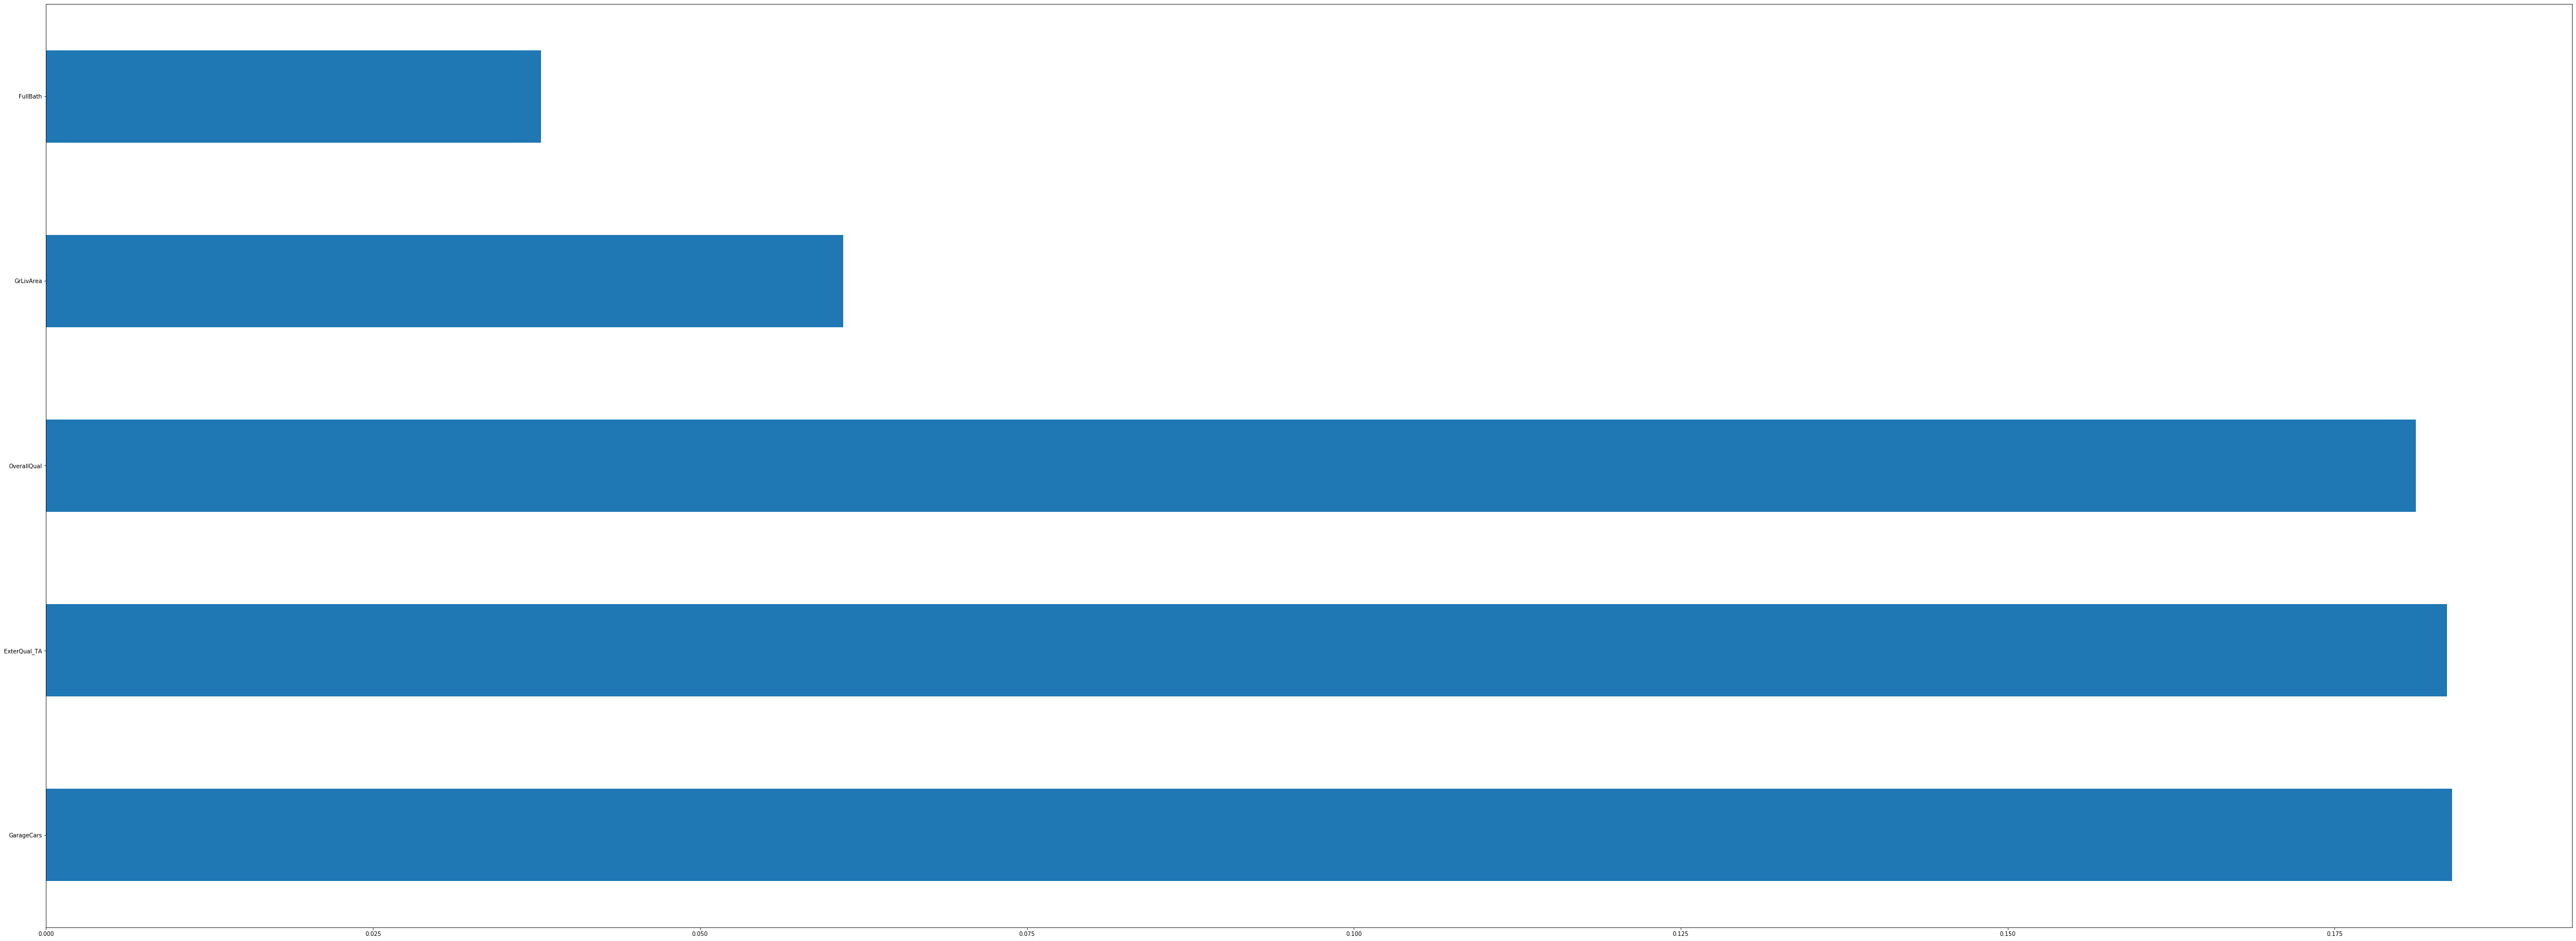

In [38]:
#plot feature imp graph
plt.figure(figsize=(80,30))
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 226) (268, 226) (1070,) (268,)


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
#HyperParameters

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1400,num=15)]

#number of features to consider at every split
max_features=['auto','sqrt']

#max number of levels in a tree
max_depth=[int(x) for x in np.linspace(5,20,num=8)]

#min number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#min sample required at each node
min_samples_leaf=[1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#create random search cv
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 192, 285, 378, 471, 564, 657, 750, 842, 935, 1028, 1121, 1214, 1307, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 13, 15, 17, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
regressor = RandomForestRegressor()
#regressor.fit(X_train, y_train)

In [46]:
rf_random=RandomizedSearchCV(estimator=regressor, param_distributions=random_grid,
                             n_iter=20, scoring='neg_mean_squared_error', 
                             n_jobs=1, iid='deprecated',refit=True, cv=10,
                             verbose=2, random_state=42)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.9s
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.9s
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 
[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.9s
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 
[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.9s
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 
[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.8s
[CV] n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7 
[CV]  n_estimators=564, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=7, total=   3.9s
[CV] n_estimators=564, min_samples_split=10

[CV]  n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=192, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=192, min_samples_split=2,

[CV]  n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.1s
[CV] n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.2s
[CV] n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.1s
[CV] n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.1s
[CV] n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1028, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=5, total=   6.1s
[CV] n_estimators=1028, min_samples_split=1

[CV]  n_estimators=657, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=11, total=   0.9s
[CV] n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13 
[CV]  n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13, total=   3.8s
[CV] n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13 
[CV]  n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13, total=   3.8s
[CV] n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13 
[CV]  n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13, total=   3.8s
[CV] n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13 
[CV]  n_estimators=378, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=13, total=   3.9s
[CV] n_estimators=378, min_samples_split=

[CV]  n_estimators=1028, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1028, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1028, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17 
[CV]  n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17, total=   1.0s
[CV] n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17 
[CV]  n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17, total=   1.0s
[CV] n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17 
[CV]  n_estimators=750, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=17, total=   1.0s
[CV] n_estimators=750, min_samples_sp

[CV]  n_estimators=285, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   0.4s
[CV] n_estimators=285, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=285, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   0.4s
[CV] n_estimators=285, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=285, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   0.4s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  8.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [48]:
pred=rf_random.predict(X_test)

In [49]:
pred

array([156760.83231565, 245444.85982833, 317053.56145834, 152144.51338746,
       105155.52351513, 200280.51648765, 350848.41919991, 155582.68931435,
       121234.63927401, 132952.08662248, 319920.84073175, 194757.95221827,
       128617.01947501, 140653.92943634, 179105.09114436, 147323.33134631,
       105555.42107124, 296791.59848965, 115706.88730305, 126854.74553891,
       195574.98385414, 205963.28286789, 161665.38596897, 146170.91250095,
       282562.7836271 , 163773.23131018, 241935.42453215, 289846.20502781,
       164933.41405099, 181067.07156713, 146990.77420478, 111333.48660391,
       220888.90946409, 272974.63734892, 146521.38958253, 181936.03439821,
       126041.83863423, 141992.54024353, 147776.34567657, 249168.92640459,
       332846.16065651, 276706.17273992, 176479.60496683, 121865.14496662,
       179306.3364209 , 142755.11610649, 261562.68482208, 176297.60419424,
       128221.75125311, 144416.88661751, 152203.4684599 , 124935.28209374,
       318486.07760816, 1

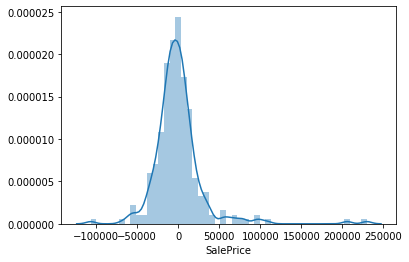

In [50]:
import seaborn as sns
sns.distplot(y_test-pred)

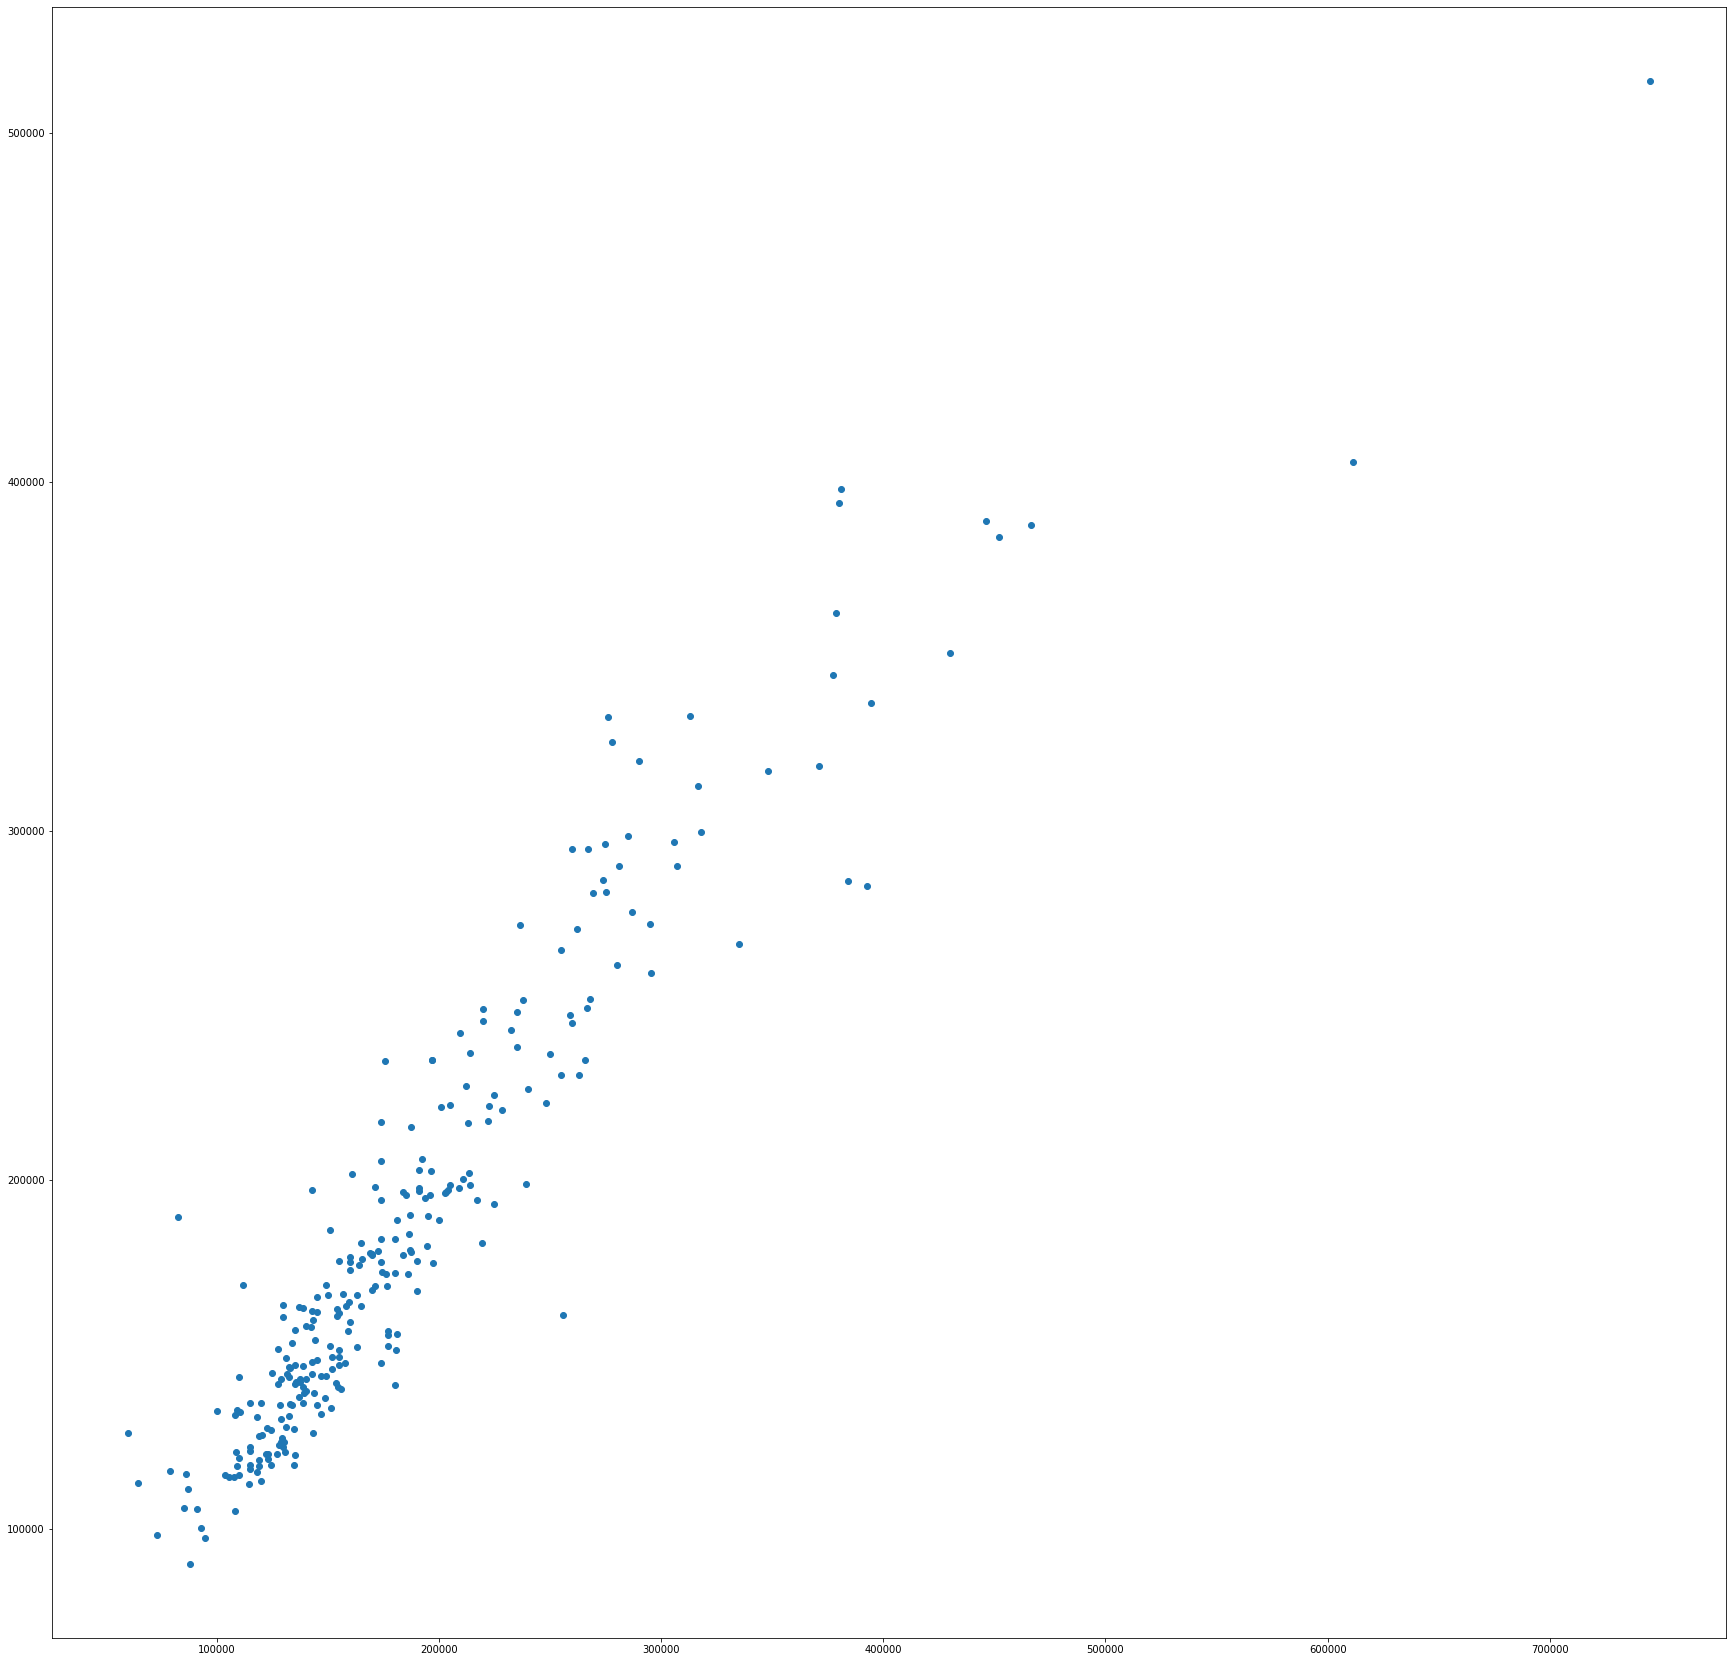

In [51]:
#categories = np.array(['y_test','pred'])

#colormap = np.array(['r', 'g'])
plt.figure(figsize=(30,30))

plt.scatter(y_test,pred)


In [52]:
print('score :',rmse(y_test, pred))

score : 0.14268024643227084
